In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [146]:
data = pd.read_csv('data_clean_csv.csv')
data

,Temperature,Mass Loss,Density,Porosity,P-Wave,S-Wave,Ed,Damage,TC
0,25,0.000000,2.666755,1.12000,3683.000,2173.000,36.17317,0.000000,2.393781
1,25,0.000000,2.693423,1.13120,3719.830,2194.730,37.26925,0.000000,2.417719
2,25,0.000000,2.690756,1.13008,3716.147,2192.557,37.15866,0.000000,2.415325
3,25,0.000000,2.688089,1.12896,3712.464,2190.384,37.04829,0.000000,2.412931
4,25,0.000000,2.685422,1.12784,3708.781,2188.211,36.93814,0.000000,2.410537
5,25,0.000000,2.682756,1.12672,3705.098,2186.038,36.82820,0.000000,2.408144
6,25,0.000000,2.680089,1.12560,3701.415,2183.865,36.71848,0.000000,2.405750
7,25,0.000000,2.677422,1.12448,3697.732,2181.692,36.60899,0.000000,2.403356
8,100,0.041000,2.642827,1.30000,3824.000,2179.000,38.64600,-0.078034,2.381300
9,100,0.041410,2.669255,1.31300,3862.240,2200.790,39.81701,-0.078814,2.405113


In [147]:
data.describe()

,Temperature,Mass Loss,Density,Porosity,P-Wave,S-Wave,Ed,Damage,TC
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,452.500000,0.501553,2.576634,1.907613,2553.947700,1447.287262,20.021589,0.445424,1.693759
std,285.171501,0.421951,0.061758,0.642198,1069.541263,641.652777,13.931202,0.381880,0.710496
min,25.000000,0.000000,2.491100,1.120000,961.000000,393.000000,2.300580,-0.078814,0.511000
25%,200.000000,0.044297,2.520839,1.308775,1495.023750,904.061500,5.633115,0.000000,0.920169
50%,450.000000,0.481900,2.562207,1.753600,2714.300000,1465.680000,18.923210,0.462515,1.948835
75%,700.000000,0.935813,2.631045,2.394875,3706.018750,2179.673000,36.717933,0.842661,2.355933
max,900.000000,1.111000,2.693423,3.090600,3862.240000,2200.790000,39.817010,0.941235,2.417719


In [148]:
X=pd.DataFrame(data, columns=['Temperature', 'Mass Loss', 'Density', 'Porosity', 'P-Wave', 'S-Wave', 'Ed'])
y=pd.DataFrame(data, columns=['Damage', 'TC'])

In [149]:
data.count()

Temperature    80
Mass Loss      80
Density        80
Porosity       80
P-Wave         80
S-Wave         80
Ed             80
Damage         80
TC             80
dtype: int64

In [150]:
data.corr()

,Temperature,Mass Loss,Density,Porosity,P-Wave,S-Wave,Ed,Damage,TC
Temperature,1.000000,0.977289,-0.966356,0.975597,-0.980631,-0.987522,-0.981422,0.980923,-0.954533
Mass Loss,0.977289,1.000000,-0.940969,0.967261,-0.981215,-0.986775,-0.980839,0.982749,-0.952369
Density,-0.966356,-0.940969,1.000000,-0.896012,0.925793,0.934806,0.963380,-0.956466,0.869406
Porosity,0.975597,0.967261,-0.896012,1.000000,-0.982732,-0.986207,-0.949586,0.953768,-0.984133
P-Wave,-0.980631,-0.981215,0.925793,-0.982732,1.000000,0.993789,0.984292,-0.987353,0.984001
S-Wave,-0.987522,-0.986775,0.934806,-0.986207,0.993789,1.000000,0.983184,-0.985411,0.972814
Ed,-0.981422,-0.980839,0.963380,-0.949586,0.984292,0.983184,1.000000,-0.999590,0.940242
Damage,0.980923,0.982749,-0.956466,0.953768,-0.987353,-0.985411,-0.999590,1.000000,-0.945986
TC,-0.954533,-0.952369,0.869406,-0.984133,0.984001,0.972814,0.940242,-0.945986,1.000000


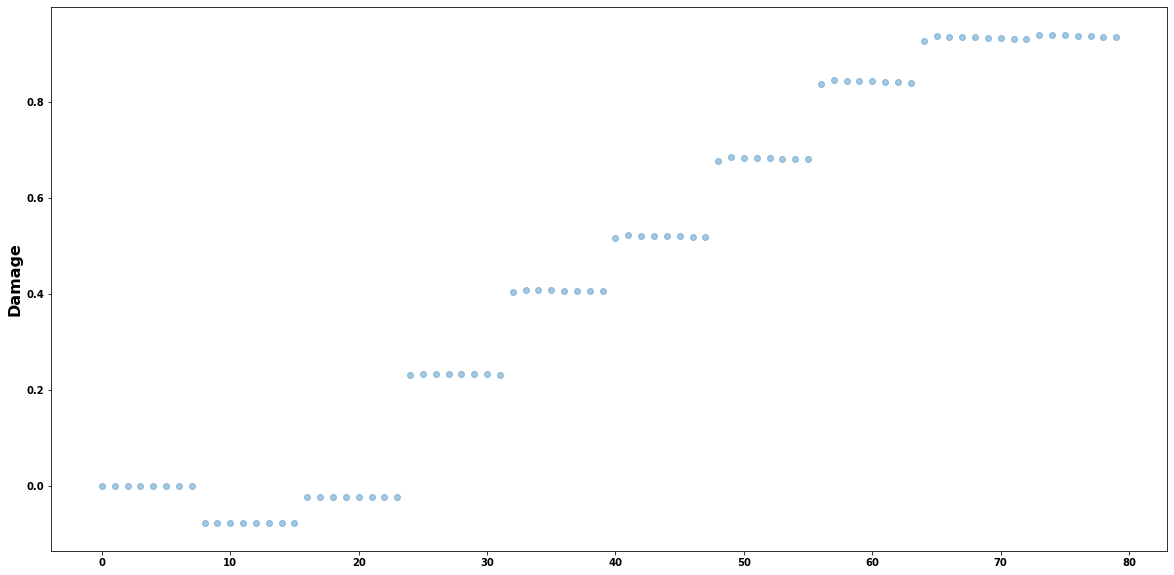

In [151]:
plt.figure(figsize=(20,10))
plt.scatter(x=data.index, y=data['Damage'], alpha=0.4)
plt.ylabel('Damage', fontsize=16)
plt.show()

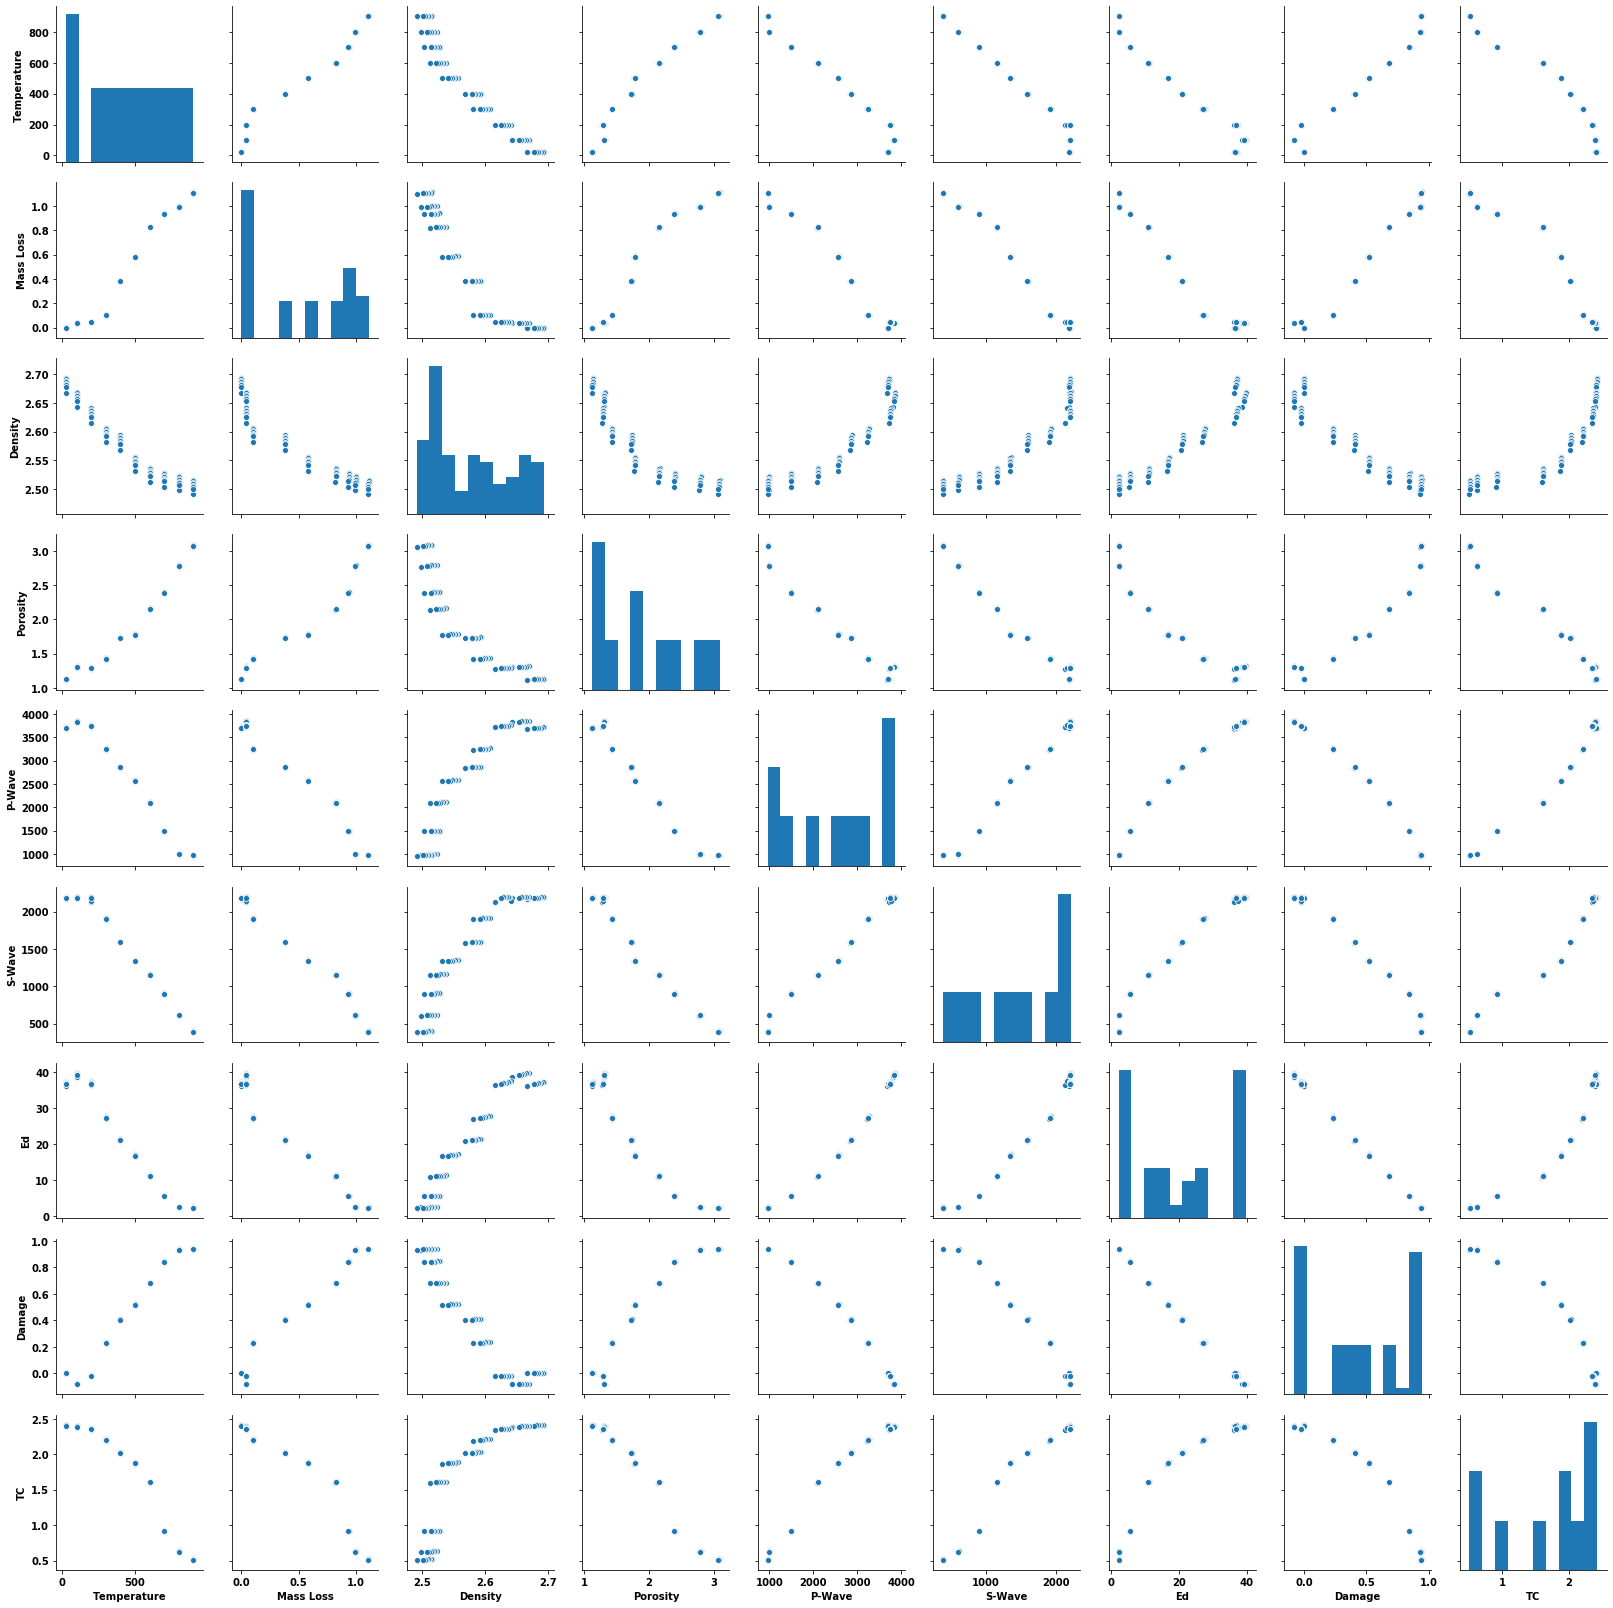

Wall time: 30 s


In [152]:
%%time

sns.pairplot(data)
plt.show()

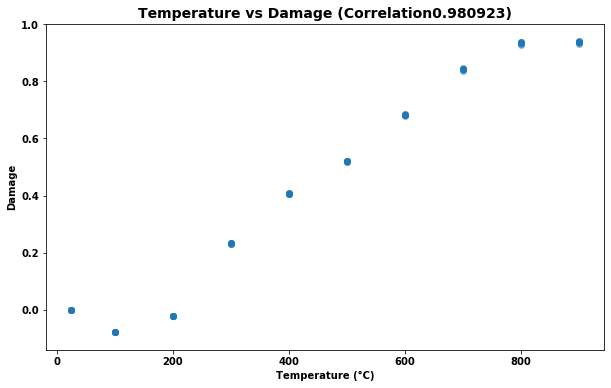

In [153]:
dam_temp_corr = round(data['Damage'].corr(data['Temperature']), 6)

plt.figure(figsize=(10,6))
plt.scatter(x=data['Temperature'], y=data['Damage'], alpha=0.4)
plt.title(f'Temperature vs Damage (Correlation{dam_temp_corr})', fontsize=14)
plt.xlabel('Temperature (°C)')
plt.ylabel('Damage')
plt.show()

# No Outliers found

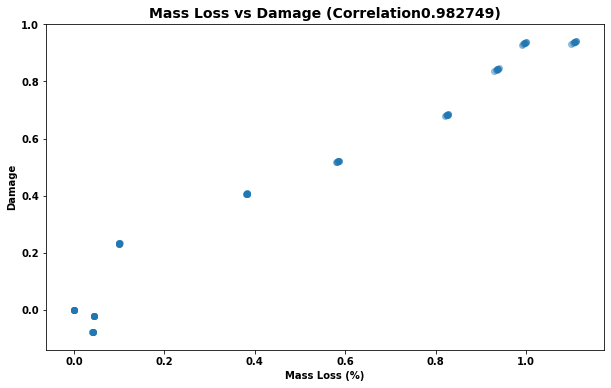

In [154]:
dam_mloss_corr = round(data['Damage'].corr(data['Mass Loss']), 6)

plt.figure(figsize=(10,6))
plt.scatter(x=data['Mass Loss'], y=data['Damage'], alpha=0.4)
plt.title(f'Mass Loss vs Damage (Correlation{dam_mloss_corr})', fontsize=14)
plt.xlabel('Mass Loss (%)')
plt.ylabel('Damage')
plt.show()

# No Outliers found

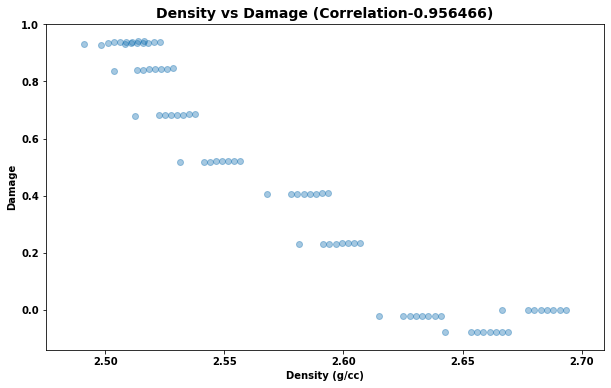

In [155]:
dam_den_corr = round(data['Damage'].corr(data['Density']), 6)

plt.figure(figsize=(10,6))
plt.scatter(x=data['Density'], y=data['Damage'], alpha=0.4)
plt.title(f'Density vs Damage (Correlation{dam_den_corr})', fontsize=14)
plt.xlabel('Density (g/cc)')
plt.ylabel('Damage')
plt.show()

# No Outliers found

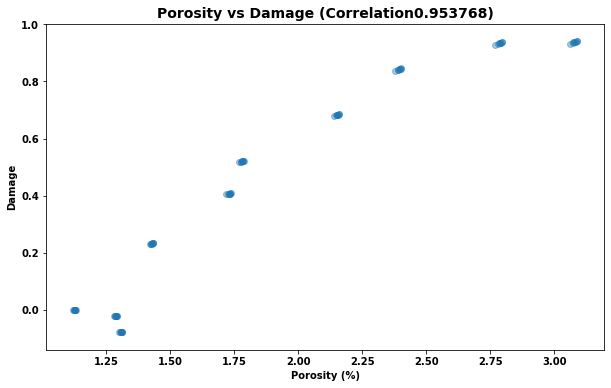

In [156]:
dam_por_corr = round(data['Damage'].corr(data['Porosity']), 6)

plt.figure(figsize=(10,6))
plt.scatter(x=data['Porosity'], y=data['Damage'], alpha=0.4)
plt.title(f'Porosity vs Damage (Correlation{dam_por_corr})', fontsize=14)
plt.xlabel('Porosity (%)')
plt.ylabel('Damage')
plt.show()

# No Outliers found

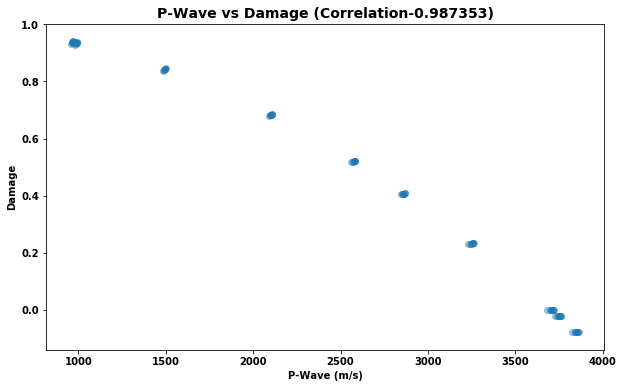

In [157]:
dam_pw_corr = round(data['Damage'].corr(data['P-Wave']), 6)

plt.figure(figsize=(10,6))
plt.scatter(x=data['P-Wave'], y=data['Damage'], alpha=0.4)
plt.title(f'P-Wave vs Damage (Correlation{dam_pw_corr})', fontsize=14)
plt.xlabel('P-Wave (m/s)')
plt.ylabel('Damage')
plt.show()

# No Outliers found

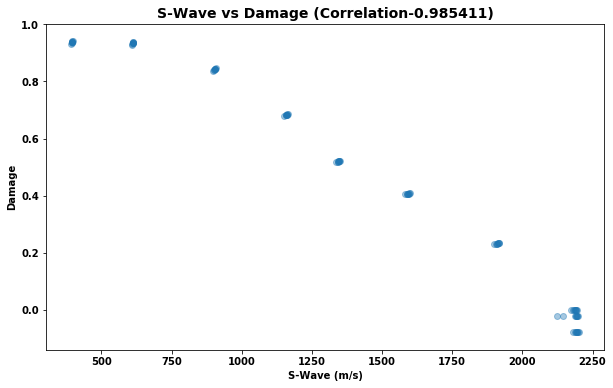

In [158]:
dam_sw_corr = round(data['Damage'].corr(data['S-Wave']), 6)

plt.figure(figsize=(10,6))
plt.scatter(x=data['S-Wave'], y=data['Damage'], alpha=0.4)
plt.title(f'S-Wave vs Damage (Correlation{dam_sw_corr})', fontsize=14)
plt.xlabel('S-Wave (m/s)')
plt.ylabel('Damage')
plt.show()

# No Outliers found

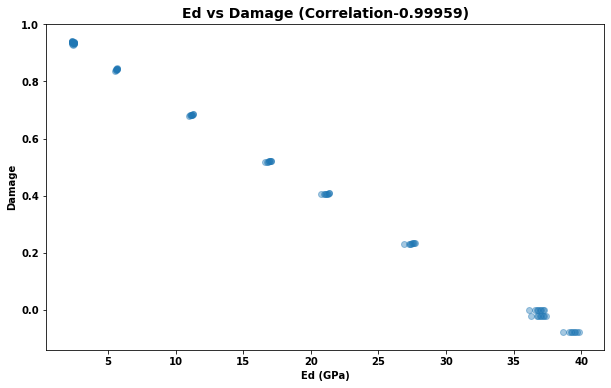

In [159]:
dam_ed_corr = round(data['Damage'].corr(data['Ed']), 6)

plt.figure(figsize=(10,6))
plt.scatter(x=data['Ed'], y=data['Damage'], alpha=0.4)
plt.title(f'Ed vs Damage (Correlation{dam_ed_corr})', fontsize=14)
plt.xlabel('Ed (GPa)')
plt.ylabel('Damage')
plt.show()

# No Outliers found

# Training and Test Dataset Split

In [160]:
damage = data['Damage']
features = data.drop(['Damage', 'TC'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, damage, test_size=0.2, random_state=10)

# Multivariable Regression

In [161]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.9999447565847656
Test data r-squared: 0.9999213599768598
Intercept -0.9177345861335087


,coef
Temperature,0.000128
Mass Loss,0.047154
Density,0.726823
Porosity,-0.020560
P-Wave,-0.000017
S-Wave,0.000028
Ed,-0.027415


In [162]:
data['Damage'].skew()

-0.06022610047319983

Text(0.5, 1.0, 'Damage')

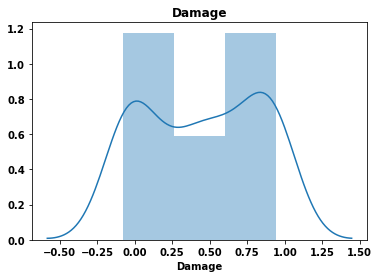

In [163]:
sns.distplot(data['Damage'])
plt.title('Damage')

# p values and evaluating coeffecients

In [164]:
# p value over 0.05 not significant
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# results.params
# results.pvalues

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,p-value
const,-0.917735,0.000
Temperature,0.000128,0.000
Mass Loss,0.047154,0.000
Density,0.726823,0.000
Porosity,-0.020560,0.037
P-Wave,-0.000017,0.003
S-Wave,0.000028,0.006
Ed,-0.027415,0.000


# Testing for Multicollinearity

In [165]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

252.6890213462689

In [166]:
# VIF greater than 10 is problematic
vif = [] # empty list
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print(vif)

[110717.1814503218, 252.6890213462689, 48.79092497089968, 58.83460112667737, 258.3110483800153, 243.64468374038532, 271.851316978347, 275.1770400038141]


In [167]:
vif = [variance_inflation_factor(exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 
             'vif': np.around(vif, 2)})

,coef_name,vif
0,const,110717.18
1,Temperature,252.69
2,Mass Loss,48.79
3,Density,58.83
4,Porosity,258.31
5,P-Wave,243.64
6,S-Wave,271.85
7,Ed,275.18


In [168]:
# Original model with all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

# Challenge: find and check official docs for results object and print out BIC & r-squared
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -532.0141860373793
r-squared is 0.9999447565847656


In [169]:
# Reduced model #1 excluding const
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['const'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_const = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -495.4151366553389
r-squared is 0.9999566241775905


In [170]:
# Reduced model #1 excluding const and density
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['const', 'Density'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -319.1461788785658
r-squared is 0.9992728831366683


In [171]:
frames = [org_coef, coef_minus_const, reduced_coef]
pd.concat(frames, axis=1)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,coef,p-value,coef,p-value,coef,p-value
Density,0.726823,0.000,0.392910,0.000,NaN,NaN
Ed,-0.027415,0.000,-0.026421,0.000,-0.037271,0.000
Mass Loss,0.047154,0.000,0.037201,0.000,0.043989,0.201
P-Wave,-0.000017,0.003,-0.000027,0.001,0.000080,0.003
Porosity,-0.020560,0.037,-0.008135,0.531,0.326203,0.000
S-Wave,0.000028,0.006,0.000012,0.357,0.000315,0.000
Temperature,0.000128,0.000,0.000022,0.300,-0.000255,0.001
const,-0.917735,0.000,NaN,NaN,NaN,NaN


In [172]:
damage = data['Damage']
features = data.drop(['Damage', 'Density'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, damage, test_size=0.2, random_state=10)

In [173]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.9997209366501838
Test data r-squared: 0.9994771378940374
Intercept 1.0005979928806807


,coef
Temperature,-0.000114
Mass Loss,0.026872
Porosity,0.029943
P-Wave,-0.000030
S-Wave,0.000017
Ed,-0.026125
TC,0.000150


# For TC

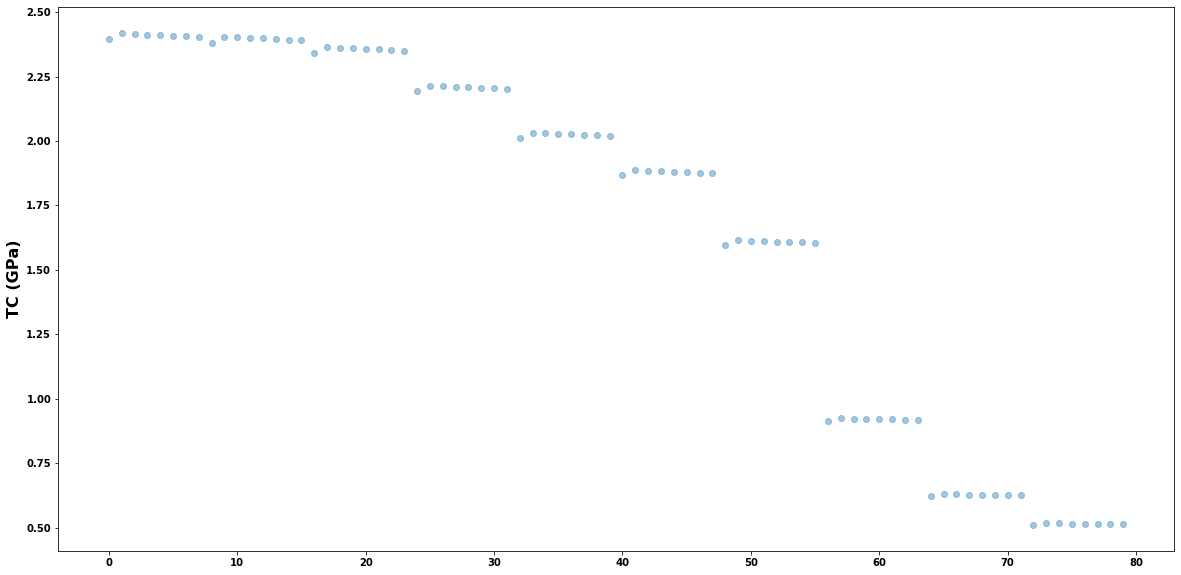

In [174]:
plt.figure(figsize=(20,10))
plt.scatter(x=data.index, y=data['TC'], alpha=0.4)
plt.ylabel('TC (GPa)', fontsize=16)
plt.show()

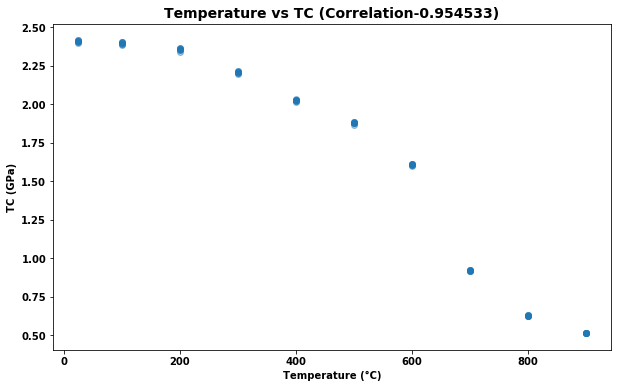

In [175]:
tc_temp_corr = round(data['TC'].corr(data['Temperature']), 6)

plt.figure(figsize=(10,6))
plt.scatter(x=data['Temperature'], y=data['TC'], alpha=0.4)
plt.title(f'Temperature vs TC (Correlation{tc_temp_corr})', fontsize=14)
plt.xlabel('Temperature (°C)')
plt.ylabel('TC (GPa)')
plt.show()

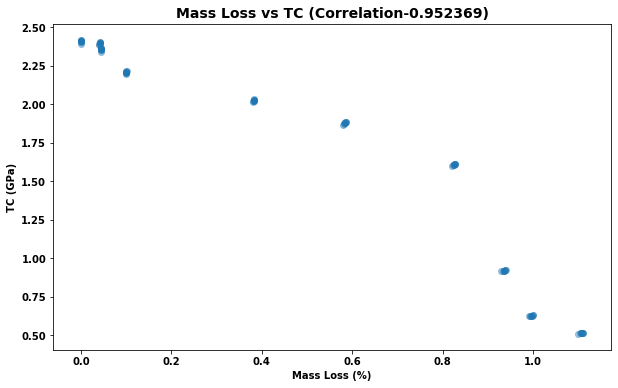

In [176]:
tc_mloss_corr = round(data['TC'].corr(data['Mass Loss']), 6)

plt.figure(figsize=(10,6))
plt.scatter(x=data['Mass Loss'], y=data['TC'], alpha=0.4)
plt.title(f'Mass Loss vs TC (Correlation{tc_mloss_corr})', fontsize=14)
plt.xlabel('Mass Loss (%)')
plt.ylabel('TC (GPa)')
plt.show()

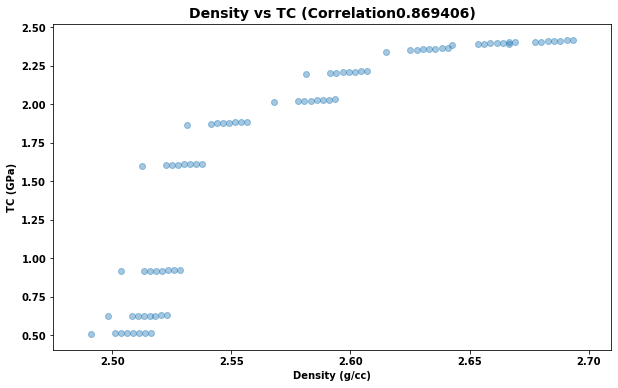

In [177]:
tc_den_corr = round(data['TC'].corr(data['Density']), 6)

plt.figure(figsize=(10,6))
plt.scatter(x=data['Density'], y=data['TC'], alpha=0.4)
plt.title(f'Density vs TC (Correlation{tc_den_corr})', fontsize=14)
plt.xlabel('Density (g/cc)')
plt.ylabel('TC (GPa)')
plt.show()

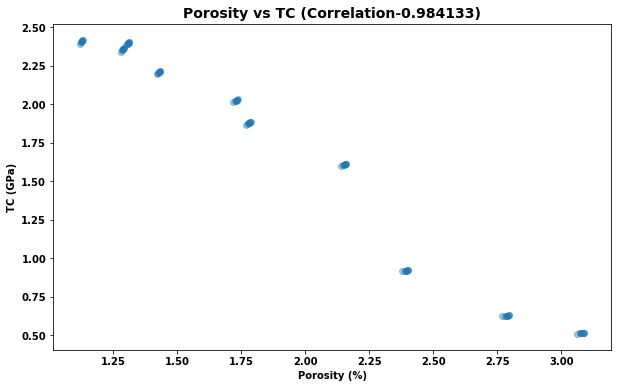

In [178]:
tc_por_corr = round(data['TC'].corr(data['Porosity']), 6)

plt.figure(figsize=(10,6))
plt.scatter(x=data['Porosity'], y=data['TC'], alpha=0.4)
plt.title(f'Porosity vs TC (Correlation{tc_por_corr})', fontsize=14)
plt.xlabel('Porosity (%)')
plt.ylabel('TC (GPa)')
plt.show()

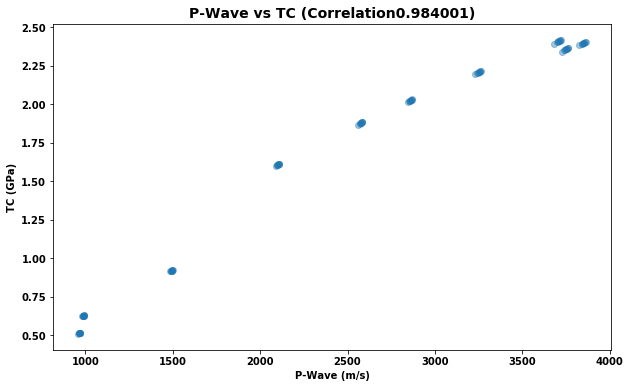

In [179]:
tc_pw_corr = round(data['TC'].corr(data['P-Wave']), 6)

plt.figure(figsize=(10,6))
plt.scatter(x=data['P-Wave'], y=data['TC'], alpha=0.4)
plt.title(f'P-Wave vs TC (Correlation{tc_pw_corr})', fontsize=14)
plt.xlabel('P-Wave (m/s)')
plt.ylabel('TC (GPa)')
plt.show()

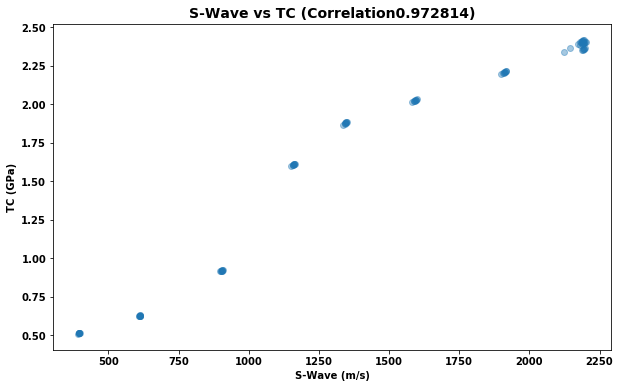

In [180]:
tc_sw_corr = round(data['TC'].corr(data['S-Wave']), 6)

plt.figure(figsize=(10,6))
plt.scatter(x=data['S-Wave'], y=data['TC'], alpha=0.4)
plt.title(f'S-Wave vs TC (Correlation{tc_sw_corr})', fontsize=14)
plt.xlabel('S-Wave (m/s)')
plt.ylabel('TC (GPa)')
plt.show()

# Training and Test Dataset Split

In [195]:
TC = data['TC']
features = data.drop(['Damage', 'TC'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, TC, test_size=0.2, random_state=10)

In [196]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.9948606987792737
Test data r-squared: 0.9960102405144172
Intercept 1.4827540162998916


,coef
Temperature,-0.001132
Mass Loss,-0.170644
Density,-0.766784
Porosity,0.327146
P-Wave,0.001462
S-Wave,-0.000217
Ed,-0.062986


In [197]:
data['TC'].skew()

-0.6202810152825906

Text(0.5, 1.0, 'TC')

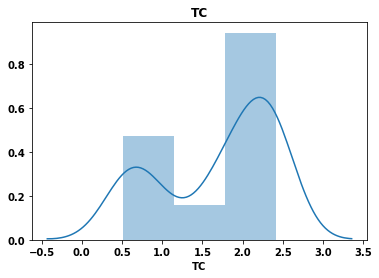

In [198]:
sns.distplot(data['TC'])
plt.title('TC')

# p value and coefficients

In [199]:
# p value over 0.05 not significant
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# results.params
# results.pvalues

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,p-value
const,1.482754,0.525
Temperature,-0.001132,0.005
Mass Loss,-0.170644,0.135
Density,-0.766784,0.377
Porosity,0.327146,0.062
P-Wave,0.001462,0.000
S-Wave,-0.000217,0.221
Ed,-0.062986,0.000


# Testing for Multicollinearity

In [186]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

252.6890213462689

In [187]:
# VIF greater than 10 is problematic
vif = [] # empty list
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print(vif)

[110717.1814503218, 252.6890213462689, 48.79092497089968, 58.83460112667737, 258.3110483800153, 243.64468374038532, 271.851316978347, 275.1770400038141]


In [188]:
vif = [variance_inflation_factor(exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 
             'vif': np.around(vif, 2)})

,coef_name,vif
0,const,110717.18
1,Temperature,252.69
2,Mass Loss,48.79
3,Density,58.83
4,Porosity,258.31
5,P-Wave,243.64
6,S-Wave,271.85
7,Ed,275.18


In [189]:
# Original model with all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

# Challenge: find and check official docs for results object and print out BIC & r-squared
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -163.18720300043995
r-squared is 0.9948606987792737


In [190]:
# Reduced model #1 excluding const
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['const'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_const = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -166.88035742080777
r-squared is 0.9991438698827455


In [191]:
# Reduced model #1 excluding const and density
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['const', 'Density'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -169.0788311566282
r-squared is 0.9991172396435382


In [192]:
frames = [org_coef, coef_minus_const, reduced_coef]
pd.concat(frames, axis=1)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,coef,p-value,coef,p-value,coef,p-value
Density,-0.766784,0.377,-0.227291,0.188,NaN,NaN
Ed,-0.062986,0.000,-0.064593,0.000,-0.058316,0.000
Mass Loss,-0.170644,0.135,-0.154564,0.162,-0.158490,0.154
P-Wave,0.001462,0.000,0.001478,0.000,0.001416,0.000
Porosity,0.327146,0.062,0.307071,0.073,0.113662,0.185
S-Wave,-0.000217,0.221,-0.000191,0.265,-0.000366,0.001
Temperature,-0.001132,0.005,-0.000961,0.001,-0.000800,0.002
const,1.482754,0.525,NaN,NaN,NaN,NaN


In [200]:
TC = data['TC']
features = data.drop(['TC', 'Density'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, damage, test_size=0.2, random_state=10)

In [202]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 1.0
Test data r-squared: 1.0
Intercept -2.9976021664879227e-15


,coef
Temperature,7.657970e-18
Mass Loss,-4.359861e-16
Porosity,-2.871567e-16
P-Wave,-3.348968e-18
S-Wave,2.543639e-18
Ed,2.686136e-16
Damage,1.000000e+00
